In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# visuals
import matplotlib.pyplot as plt
import seaborn as sns


#ssss
targ = 'SUSPECT_ARRESTED_FLAG'
Table1_target = ["SUSPECT_ARRESTED_FLAG", "STOP_WAS_INITIATED",
                 "OBSERVED_DURATION_MINUTES", "SUSPECTED_CRIME_DESCRIPTION",
                 "STOP_DURATION_MINUTES", "FIREARM_FLAG",
                 "SUSPECT_RACE_DESCRIPTION",
                 "DEMEANOR_OF_PERSON_STOPPED", "SUSPECT_BODY_BUILD_TYPE"]



Table1 = pd.read_excel("sqf2022.xlsx", usecols=Table1_target)

#replace (null) in fire arm flag with No, so it wouldn't cause problem if we want to remove 
# (null) that represent missing value
Table1['FIREARM_FLAG'] = Table1['FIREARM_FLAG'].replace('(null)', 'No')

n_unique = Table1['DEMEANOR_OF_PERSON_STOPPED'].nunique()
unique_values = Table1['DEMEANOR_OF_PERSON_STOPPED'].unique()
print(f'Number of unique values: {n_unique}')
print(f'Unique values: {unique_values}')


#Binarize
lb = LabelBinarizer()
Table1["SUSPECT_ARRESTED_FLAG"] = lb.fit_transform(Table1["SUSPECT_ARRESTED_FLAG"])
Table1["FIREARM_FLAG"] = lb.fit_transform(Table1["FIREARM_FLAG"])

#Bag-of-word Incomplete!
Table1["DEMEANOR_OF_PERSON_STOPPED"].fillna("Calm", inplace=True)
vectorizer = CountVectorizer()
BOW_trans = vectorizer.fit_transform(Table1["DEMEANOR_OF_PERSON_STOPPED"])
BOW_df = pd.DataFrame(BOW_trans.toarray(), columns=vectorizer.get_feature_names_out())

#Lable encodeing
Label_Encode_feature = ["SUSPECT_RACE_DESCRIPTION","SUSPECTED_CRIME_DESCRIPTION","STOP_WAS_INITIATED"]
Label_En = OneHotEncoder(handle_unknown="ignore")
Feature_Encoded = Label_En.fit_transform(Table1[Label_Encode_feature])
Label_df = pd.DataFrame(Feature_Encoded.toarray(), columns=Label_En.get_feature_names_out(Label_Encode_feature))
#Labeled_columns = Label_En.get_feature_names(Label_Encode_feature)

# join the one-hot encoded columns to the original dataframe
#Table1 = Table1.join(Label_df,BOW_df)
Table1 = pd.concat([Table1, Label_df], axis=1)

# drop the original categorical feature column
Table1 = Table1.drop(columns=Label_Encode_feature)
#Table1 = Table1.drop(columns="DEMEANOR_OF_PERSON_STOPPED")
# print the updated dataframe



# save the updated dataframe to a CSV file
Table1.to_csv('output.csv', index=False)

Number of unique values: 1685
Unique values: ['FLED ON FOOT' nan 'NERVOUS CHANGING DIRECTION FROM OFFICERS RUNNING' ...
 'IRRITATED CONFUSED' 'AGITATED AND THEN CALM' 'ANNOYED NON COMPLIANT']


2
[1 0]
0    10117
1     4985
Name: SUSPECT_ARRESTED_FLAG, dtype: int64


<Axes: >

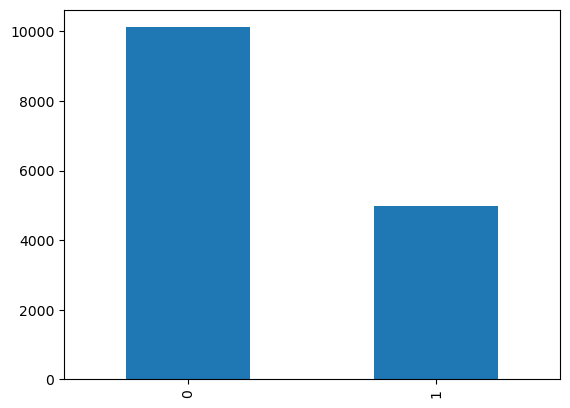

In [3]:
# Exploring SUSPECT_ARRESTED_FLAG feature
n_unique = Table1['SUSPECT_ARRESTED_FLAG'].nunique()
unique_values = Table1['SUSPECT_ARRESTED_FLAG'].unique()

value_counts = Table1['SUSPECT_ARRESTED_FLAG'].value_counts()
print(n_unique)
print(unique_values)
print(value_counts)

#print(Table1.head(20))

Table1['SUSPECT_ARRESTED_FLAG'].value_counts().plot(kind='bar')
#plt.show()



In [4]:
# Scatter plot of feature correlations with target 'SUSPECT_ARRESTED_FLAG'
# Data Clean
#plot.scatter(df.x, df.y)
Table2_target = ["SUSPECT_ARRESTED_FLAG", "STOP_WAS_INITIATED", "SUSPECTED_CRIME_DESCRIPTION", "FIREARM_FLAG",
                 "SUSPECT_RACE_DESCRIPTION", "SUSPECT_BODY_BUILD_TYPE"]


Table2 = pd.read_excel("sqf2022.xlsx", usecols=Table2_target)

# Binarize table2
lb = LabelBinarizer()
Table2["SUSPECT_ARRESTED_FLAG"] = lb.fit_transform(Table2["SUSPECT_ARRESTED_FLAG"])
Table2["FIREARM_FLAG"] = lb.fit_transform(Table2["FIREARM_FLAG"])

#one hot encode table2
Label_Encode_feature = ["SUSPECT_RACE_DESCRIPTION","SUSPECTED_CRIME_DESCRIPTION","STOP_WAS_INITIATED"]
Label_En = OneHotEncoder(handle_unknown="ignore")
Feature_Encoded = Label_En.fit_transform(Table2[Label_Encode_feature])
Label_df = pd.DataFrame(Feature_Encoded.toarray(), columns=Label_En.get_feature_names_out(Label_Encode_feature))

# Label encode body type

LE = LabelEncoder()

Table2['SUSPECT_BODY_BUILD_TYPE'] = LE.fit_transform(Table2['SUSPECT_BODY_BUILD_TYPE'])
Table2['SUSPECT_BODY_BUILD_TYPE'].fillna(Table2['SUSPECT_BODY_BUILD_TYPE'].mean, inplace = True)


Table2 = pd.concat([Table2,Label_df],axis=1)

Table2 = Table2.drop(columns=Label_Encode_feature)

Table2.to_csv('output2.csv', index=False)


<Axes: >

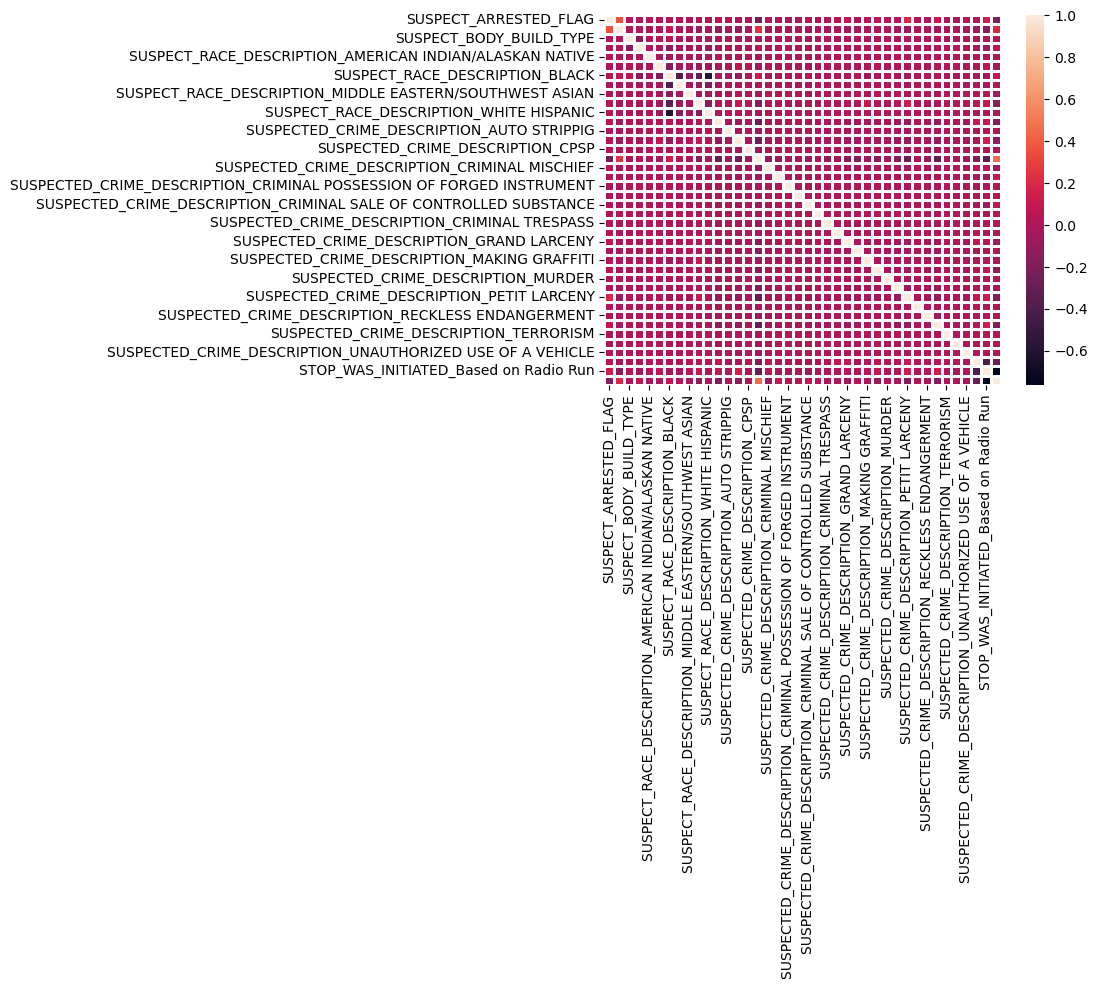

In [12]:
corr_matrix = Table2.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=False,linewidth=1)

In [14]:
# Exploring DEMEANOR_OF_PERSON_STOPPED feature
demeanor = Table1['DEMEANOR_OF_PERSON_STOPPED']



0                                         FLED ON FOOT
1                                                 Calm
2     NERVOUS CHANGING DIRECTION FROM OFFICERS RUNNING
3                                                 CALM
4                                                 CALM
5                                              HOSTILE
6                                                 Calm
7                                                 CALM
8                                                 Calm
9                                                 CALM
10                                             NERVOUS
11                                            FATIGUED
12                                             NERVOUS
13                                             NERVOUS
14                                          AGGRAVATED
15                                                CALM
16                                       UNCOOPERATIVE
17                                                Calm
18        